In [ ]:
%pip install hdf5storage

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import scipy.io as sio
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
import math
import time
import sys
import glob
import hdf5storage
from random import shuffle
import time
import os
import cv2

limb = np.array([[0,1],[0,14],[0,15],[14,16],[15,17],[1,2],[1,5],[1,8],[1,11],[2,3],[3,4],[5,6],[6,7],[8,9],[9,10],[11,12],[12,13]])

original_data = hdf5storage.loadmat('examples/oct17set1_fw_1814.mat')
data = hdf5storage.loadmat('examples/oct17set1_fw_1814.mat', variable_names={'csi_serial', 'frame'})
csi_data = torch.zeros(1, 30*5, 3, 3)

In [ ]:
!python3 --version
print(torch.__version__)


Python 3.8.10
1.13.1+cu116


# Testing and analyzing data from .mat file

In [ ]:
original_data.keys()
original_data['jointsVector'].shape

dict_keys(['csi_serial', 'frame', 'jointsMatrix', 'jointsVector'])

Joints Vector

In [7]:
for i in range(36,54):
  print(original_data['jointsVector'][i],end=",")
print()

[0.86895621],[0.79284722],[0.81481451],[0.85764551],[0.86097556],[0.77087992],[0.73759615],[0.75175923],[0.73579437],[0.85167599],[0.79863048],[0.80230129],[0.83318049],[0.82899648],[0.88459724],[0.86868674],[0.92242718],[0.52526784],


In [6]:
for i in range(54,72):
  print(original_data['jointsVector'][i],end=",")
print()

[0.86895621],[0.79284722],[0.81481451],[0.85764551],[0.86097556],[0.77087992],[0.73759615],[0.75175923],[0.73579437],[0.85167599],[0.79863048],[0.80230129],[0.83318049],[0.82899648],[0.88459724],[0.86868674],[0.92242718],[0.52526784],

JointsMatrix

In [5]:
print(original_data['jointsMatrix'].shape)
print(original_data['jointsMatrix'][2,0,1])
print(original_data['jointsMatrix'][3,0,1])
print(original_data['jointsMatrix'][:,0,0])

(4, 18, 18)
0.688949510632689
0.688949510632689
[486.67163086 252.41996765   0.86895621   0.86895621]


In [8]:
print(csi_data.shape)

torch.Size([1, 150, 3, 3])


# Model Testing

In [ ]:
import hdf5storage
import numpy as np
import pandas as pd
original_data = hdf5storage.loadmat('1_clapping_14.mat')

array=original_data['csi_trace']
csi_array=data['csi_serial'].copy()
csi_array=np.zeros((5,30,3,3),dtype=np.complex_)
print(csi_array.shape)


print(len(array))
print(len(array[0]))
print(len(array[0][0][0]))
print(len(array[0][0][0][0]))
print(len(array[0][0][0][0][0]))
print(len(array[0][0][0][0][11]))


def return_csi(i1,i2,i3,i4,i5):
  array=original_data['csi_trace']
  csi_o=array[i1][i2][i3][i4][i5].copy()


  csi_1=array[i1][i2][i3][i4][i5].copy()
  csi_1=csi_1.reshape(30,3,3)

  for t in range(3):
      for r in range (3):
          for sb in range(30):
              csi_1[sb][t][r]=csi_o[t][r][sb]
  return csi_1

In [ ]:
for i in range(5):
  csi_array[i]=return_csi(i,0,0,0,11)

csi_array=csi_array.real

/usr/local/lib/python3.8/dist-packages/torch/serialization.py:868: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.8/dist-packages/torch/serialization.py:868: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.8/dist-packages/torch/serialization.py:868: SourceChangeWarning: source code of class 'torch.nn.modules.batchnorm.BatchNorm2d' has changed. you can retrieve the original source code by accessing the object's source attribute o

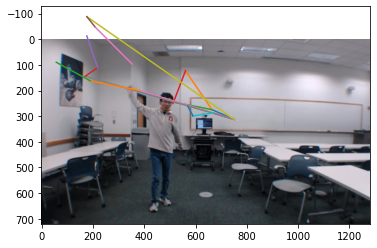

-1

In [ ]:
# torch.from_numpy(data['csi_serial']).type(torch.FloatTensor).shape
csi_data[0,:,:,: ]= torch.from_numpy(data['csi_serial']).type(torch.FloatTensor).reshape(-1, 3, 3)
frame = data['frame']
# csi_data[0,:,:,: ]= torch.from_numpy(csi_array).type(torch.FloatTensor).reshape(-1, 3, 3)

wisppn = torch.load('weights/wisppn-20190226.pkl')
wisppn = wisppn.cuda().eval()

csi_data = Variable(csi_data.cuda())
pred_xy = wisppn(csi_data)
pred_xy = pred_xy.cpu().detach().numpy()

poseVector_x = np.zeros((1,18))
poseVector_y = np.zeros((1,18))
for index in range(18):
    poseVector_x[0,index] = pred_xy[0,0,index,index]
    poseVector_y[0,index] = pred_xy[0,1,index,index]



    # Display the image
plt.imshow(cv2.resize(frame, (1280, 720)))

for i in range(len(limb)):
    plt.plot(poseVector_x[0, [limb[i, 0], limb[i, 1]]], poseVector_y[0,[limb[i, 0], limb[i, 1]]])

plt.show()
cv2.waitKey(15)

# while 1:
#     # Display the image
#     plt.imshow(cv2.resize(frame, (1280, 720)))

#     for i in range(len(limb)):
#         plt.plot(poseVector_x[0, [limb[i, 0], limb[i, 1]]], poseVector_y[0,[limb[i, 0], limb[i, 1]]])

#     plt.show()
#     cv2.waitKey(15)

# Testing and verification process to convert pose coordinates into Pose Adjeacent Matrix or jointMatrix as referred to in this code

In [ ]:
%pip install hdf5storage

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
# Python program to read
# json file
  
  
import json
  
# Opening JSON file
f = open('alphapose-results (2).json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)

print(len(data["0.jpg"]["people"][0]["pose_keypoints_2d"])/3)  

# Closing file
f.close()

18.0


In [13]:
xyc=data["0.jpg"]["people"][0]["pose_keypoints_2d"].copy()

jointsvectorx=[]
jointsvectory=[]
jointsvectorc=[]


i=0
while(i<len(xyc)):
  jointsvectorx.append(xyc[i])
  i=i+1
  jointsvectory.append(xyc[i])
  i=i+1
  jointsvectorc.append(xyc[i])
  i=i+1
  
  if(i==(len(xyc))):
    break


n = 18
m = 18
jointsmatrixx=[[0] * m for i in range(n)]
jointsmatrixy=[[0] * m for i in range(n)]
jointsmatrixc=[[0] * m for i in range(n)]

for r in range(18):
  for c in range(18):
    if r==c:
      jointsmatrixx[r][c]=jointsvectorx[r]
      jointsmatrixy[r][c]=jointsvectory[r]
      jointsmatrixc[r][c]=jointsvectorc[r]
    else:
      jointsmatrixx[r][c]=jointsvectorx[r]-jointsvectorx[c]
      jointsmatrixy[r][c]=jointsvectory[r]-jointsvectory[c]
      jointsmatrixc[r][c]=jointsvectorc[r]*jointsvectorc[c]

import numpy as np
matx=np.array(jointsmatrixx)
maty=np.array(jointsmatrixy)
matc=np.array(jointsmatrixc)
jointsmatrix=np.stack((matx,maty,matc,matc),axis=0)

jointsvector=jointsvectorx+jointsvectory+jointsvectorc+jointsvectorc
jointsvector=np.array(jointsvector)

In [31]:
print(len(jointsvectorx))
print(len(jointsvectory))
print(len(jointsvectorc))
print(len(xyc))
print(jointsmatrix.shape)
print(jointsmatrix[:,0,0])
print(jointsvector.shape)

18
18
18
54
(4, 18, 18)
[689.56884766 453.73867798   0.93957597   0.93957597]
(72,)


In [23]:
for i in range(36,54):
  print(jointsvector[i],end=",")
print()

0.9395759701728821,0.8605740070343018,0.9125493764877319,0.6170833706855774,0.09345315396785736,0.8085986375808716,0.9093534350395203,0.8224131464958191,0.20396852493286133,0.1272481083869934,0.04455507546663284,0.25847479701042175,0.03516777232289314,0.07328716665506363,0.930031955242157,0.9564459323883057,0.9377683997154236,0.8925597071647644,


In [24]:
for i in range(54,72):
  print(jointsvector[i],end=",")
print()

0.9395759701728821,0.8605740070343018,0.9125493764877319,0.6170833706855774,0.09345315396785736,0.8085986375808716,0.9093534350395203,0.8224131464958191,0.20396852493286133,0.1272481083869934,0.04455507546663284,0.25847479701042175,0.03516777232289314,0.07328716665506363,0.930031955242157,0.9564459323883057,0.9377683997154236,0.8925597071647644,


In [25]:
jmatrix_label = torch.zeros(1, 4, 18, 18)
jmatrix_label[0, :, :, :] = torch.from_numpy(original_data['jointsMatrix']).type(torch.FloatTensor)
print(jmatrix_label.shape)

In [27]:
jmatrix_label_mod = torch.zeros(1, 4, 18, 18)
jmatrix_label_mod[0, :, :, :] = torch.from_numpy(jointsmatrix).type(torch.FloatTensor)
print(jmatrix_label_mod.shape)